In [2]:
# Check scikit learn version
import sklearn
print(sklearn.__version__)

0.23.1


In [9]:
# Make a regression with an RFE Pipeline
# Feature Importance and Selection
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Define Dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

In [5]:
# Create Pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

In [6]:
# Fit the model on all available data
pipeline.fit(X, y)

Pipeline(steps=[('s',
                 RFE(estimator=DecisionTreeRegressor(),
                     n_features_to_select=5)),
                ('m', DecisionTreeRegressor())])

In [7]:
# Make a prediction for one example
data = [[-2.02220122,0.31563495,0.82797464,-0.30620401,0.16003707,-1.44411381,0.87616892,-0.50446586,0.23009474,0.76201118]]

In [8]:
yhat = pipeline.predict(data)
print('Predicted: %.3f'%(yhat))

Predicted: -84.288


In [10]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

>> 2 0.754 (0.006)
>> 3 0.839 (0.018)
>> 4 0.852 (0.014)
>> 5 0.845 (0.021)
>> 6 0.846 (0.022)
>> 7 0.857 (0.017)
>> 8 0.844 (0.023)
>> 9 0.840 (0.016)


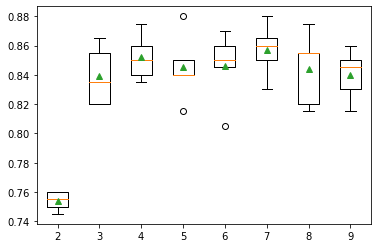

In [12]:
# RFE Hyper parameters
# Get dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=1)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 10):
		rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=i)
		model = DecisionTreeRegressor()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# Get the models to evaluate
models = get_models()
# Evaulate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>> %s %.3f (%.3f)'%(name, mean(scores), std(scores)))
# Plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [13]:
# automatically select the number of features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.883 (0.028)


In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=3, random_state=1)
# define RFE
rfe = RFE(estimator=RandomForestRegressor(n_estimators=500, random_state=1), n_features_to_select=3)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 7.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected False, Rank: 6.000
Column: 3, Selected False, Rank: 2.000
Column: 4, Selected False, Rank: 3.000
Column: 5, Selected False, Rank: 8.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 4.000
Column: 8, Selected False, Rank: 5.000
Column: 9, Selected True, Rank: 1.000
